In [76]:
import pandas as pd

In [77]:
url='https://drive.google.com/file/d/1ofiJPKb9Ji8aivZlApooyp2Qa_yHgrp9/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## Documentation

* Purpose: "To examine the performance of two different types of AIDS treatments" (4 arms)

* Question to answer with clustering model (PCA) below, using PCA (condenses to 2 columns for easier clustering)

- Unsupervised (Clustering): Tsedenia, Josh, Victor do PCA on their own

    - What clusters of patients exist?

* Question to answer with classification models below

    - How well do all the features predict mortality (cid)?

    - Members answer the question on their own with assigned models

        - Logistic regression: Tsedenia, Josh, Victor
        
        - Decision Tree, Random Forest, Extreme Random Trees: Josh
        
        - KNN, SVM: Victor 
        
        - Gradient Boosting, Ada Boost: Tsedenia

* Extra credit questions to answer with any models above

    - How well do all the features predict mortality (cid)?

    - Did the treatment success vary by demographics, age, sex, race, gender, sexual orientation, history of IV drug use

    - Other characteristics include, weight, hemophilia

    - Which variable(s) are most predictive of survival or morbidity

    - Time to failure? (optional)

* Additional Figures

    - Kaplan-Meier

    - Cox proportional hazards ratio

* Optimization

    - Check for any imbalanced data

In [78]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [79]:
df_copy = df.copy()

df_copy.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## Split and Scale

In [80]:
# split df_copy into features and target
X = df_copy.drop('cid', axis=1)
y = df_copy['cid']


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                       # Step 1: Create the scaler
scaler.fit(X_train)                           # Step 2: Fit ONLY on training data
X_train_scaled = scaler.transform(X_train)    # Step 3: Transform training data
X_test_scaled = scaler.transform(X_test)      # Step 4: Transform test data using same scaler


In [83]:
X_train_scaled
X_test_scaled

array([[0.87017256, 0.        , 0.5       , ..., 0.15046729, 0.20588235,
        0.17094516],
       [0.23993426, 0.        , 0.70689655, ..., 0.32149533, 0.22326203,
        0.19019837],
       [0.88167625, 0.        , 0.36206897, ..., 0.16448598, 0.30080214,
        0.2004084 ],
       ...,
       [0.79457683, 1.        , 0.56896552, ..., 0.18504673, 0.27540107,
        0.29317386],
       [0.85538209, 1.        , 0.55172414, ..., 0.61495327, 0.20454545,
        0.17619603],
       [0.79868529, 0.66666667, 0.31034483, ..., 0.33271028, 0.47112299,
        0.29929988]])

## Cluster using PCA

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca = PCA(n_components=2)  # or more
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


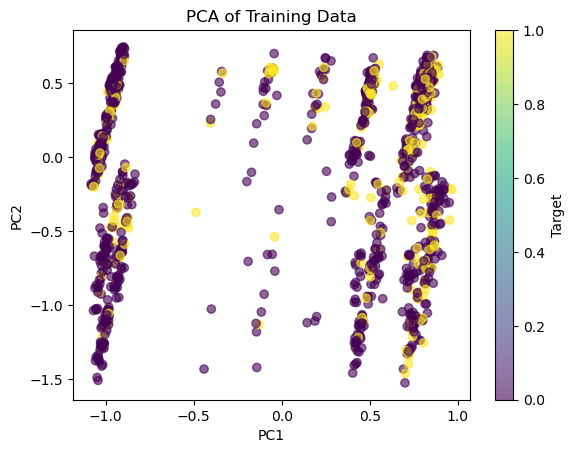

In [85]:
import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Training Data')
plt.colorbar(label='Target')
plt.show()


In [94]:
df_copy['cid'].value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

### >>Visually, no clear clustering with 2 components (nor with >2 when I tested) for PCA. Yet are there any promising modeling approaches by transforming unsupervised into supervised learning models?

## Evaluate using KNN based on PCA output, including resampling

In [86]:
# Resample using RandomOverSampler and evaluate

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(X_train_pca, y_train)

In [87]:
# Did the ROS resampling work?

import numpy as np
from collections import Counter

print("Before resampling:", Counter(y_train))
print("After resampling: ", Counter(y_train_bal))


Before resampling: Counter({0: 1213, 1: 391})
After resampling:  Counter({1: 1213, 0: 1213})


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_bal, y_train_bal)

y_pred_knn = knn.predict(X_test_pca)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       405
           1       0.29      0.48      0.36       130

    accuracy                           0.59       535
   macro avg       0.54      0.55      0.53       535
weighted avg       0.67      0.59      0.61       535



In [89]:
# Resample using SMOTE and evaluate

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train_pca, y_train)

In [90]:
# Did the SMOTE resampling work?

import numpy as np
from collections import Counter

print("Before resampling:", Counter(y_train))
print("After resampling: ", Counter(y_train_bal))

Before resampling: Counter({0: 1213, 1: 391})
After resampling:  Counter({1: 1213, 0: 1213})


In [91]:
# 5. Train KNN
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)

# 6. Predict + Evaluate
y_pred_knn = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       405
           1       0.32      0.53      0.40       130

    accuracy                           0.61       535
   macro avg       0.56      0.58      0.56       535
weighted avg       0.69      0.61      0.64       535



### >>PCA+KNN is a poor model given the low precision, recall, and F1 scores for "failure" (1) throughout

## Evaluate using SVM based on PCA output, including resampling

In [92]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# --- RANDOM OVERSAMPLER ---
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)

print("Before ROS:", Counter(y_train))
print("After ROS: ", Counter(y_train_ros))

svm_ros = SVC(kernel='rbf', class_weight='balanced')
svm_ros.fit(X_train_ros, y_train_ros)

y_pred_svm_ros = svm_ros.predict(X_test_pca)

print("SVM Classification Report w/ROS:")
print(classification_report(y_test, y_pred_svm_ros))

Before ROS: Counter({0: 1213, 1: 391})
After ROS:  Counter({1: 1213, 0: 1213})
SVM Classification Report w/ROS:
              precision    recall  f1-score   support

           0       0.82      0.56      0.66       405
           1       0.31      0.62      0.41       130

    accuracy                           0.57       535
   macro avg       0.56      0.59      0.54       535
weighted avg       0.69      0.57      0.60       535



In [93]:
# --- SMOTE ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Did the resampling work?
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

svm_smote = SVC(kernel='rbf', class_weight='balanced')
svm_smote.fit(X_train_smote, y_train_smote)

y_pred_svm_smote = svm_smote.predict(X_test_pca)

print("SVM Classification Report w/SMOTE:")
print(classification_report(y_test, y_pred_svm_smote))

Before SMOTE:  Counter({0: 1213, 1: 391})
After SMOTE:  Counter({1: 1213, 0: 1213})
SVM Classification Report w/SMOTE:
              precision    recall  f1-score   support

           0       0.82      0.55      0.66       405
           1       0.31      0.63      0.42       130

    accuracy                           0.57       535
   macro avg       0.57      0.59      0.54       535
weighted avg       0.70      0.57      0.60       535



#### Even after forcing classification through unsupervised dimensionality reduction (PCA to KNN and SVC), the models underperformed as shown by the repeatedly low F1 scores. Or as ChatGPT put it: “PCA didn’t help classification performance in this case. It reduced dimensionality, but not in a way that preserved class boundaries—so even after applying KNN or SVM, the model struggled, especially with the minority class. This points to a mismatch between unsupervised dimensionality reduction and the needs of the supervised task.”

#### I'm not convinced PCA was a strong approach given that the dataset only had around 20 columns, certainly not a high-dimensional dataset. What if we just run it without PCA?

In [97]:
# 1. Split (from df_copy)
X_nopca = df.drop('cid', axis=1)
y_nopca = df['cid']

X_train_nopca, X_test_nopca, y_train_nopca, y_test_nopca = train_test_split(
    X_nopca, y_nopca, test_size=0.2, random_state=42
)

# 2. Scale
scaler_nopca = MinMaxScaler()
X_train_scaled_nopca = scaler_nopca.fit_transform(X_train_nopca)
X_test_scaled_nopca = scaler_nopca.transform(X_test_nopca)

# 3. Resample
smote_nopca = SMOTE(random_state=42)
X_train_bal_nopca, y_train_bal_nopca = smote_nopca.fit_resample(X_train_scaled_nopca, y_train_nopca)
print("After SMOTE:", Counter(y_train_bal_nopca))

# 4. Fit SVM model
svm_nopca = SVC(kernel='rbf', class_weight='balanced')
svm_nopca.fit(X_train_bal_nopca, y_train_bal_nopca)

# 5. Predict + Evaluate
y_pred_svm_nopca = svm_nopca.predict(X_test_scaled_nopca)
print("SVM Classification Report (no PCA):")
print(classification_report(y_test_nopca, y_pred_svm_nopca))


After SMOTE: Counter({0: 1291, 1: 1291})
SVM Classification Report (no PCA):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       327
           1       0.68      0.74      0.71       101

    accuracy                           0.86       428
   macro avg       0.80      0.82      0.81       428
weighted avg       0.86      0.86      0.86       428



In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

# Dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM (RBF Kernel)': SVC(kernel='rbf', class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Store F1 scores
f1_scores = {}

for name, model in models.items():
    try:
        model.fit(X_train_bal_nopca, y_train_bal_nopca)
        y_pred = model.predict(X_test_scaled_nopca)
        
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test_nopca, y_pred))
        
        f1 = f1_score(y_test_nopca, y_pred, average='weighted')
        f1_scores[name] = f1
    except Exception as e:
        print(f"\n{name} failed: {e}")

# Print a summary of F1 scores
print("\nModel F1 Score Summary (weighted):")
for name, score in sorted(f1_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.3f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       327
           1       0.68      0.76      0.72       101

    accuracy                           0.86       428
   macro avg       0.80      0.82      0.81       428
weighted avg       0.87      0.86      0.86       428


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       327
           1       0.67      0.71      0.69       101

    accuracy                           0.85       428
   macro avg       0.79      0.80      0.79       428
weighted avg       0.85      0.85      0.85       428


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       327
           1       0.75      0.71      0.73       101

    accuracy                           0.88       428
   macro